# [header]

https://www.youtube.com/watch?v=U3X98xZ4_no    


### Imported Libraries

In [67]:
import pandas as pd
print('pandas version: %s' % (pd.__version__))
import numpy as np
print('numpy version: %s' % (np.__version__))
import regex as re
print('regex version: %s' % (re.__version__))
import imblearn
print('imblearn version: %s' % imblearn.__version__)
print()
import sys
print('python version: %s' % (sys.version))

pandas version: 1.1.3
numpy version: 1.19.2
regex version: 2.5.86
imblearn version: 0.7.0

python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [84]:
import seaborn as sns

from collections import Counter

from imblearn.over_sampling import SMOTE # https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.filterwarnings('ignore')
#sns.set_theme(style="darkgrid")
#sns.set_theme(style='white')

### User Functions

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [4]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

def generate_auc_roc_curve(clf, X_test, y_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [5]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

def generate_roc_curve(clf, X_test, y_test):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    plt.title('ROC Curve')
    plot_roc_curve(clf, X_test, y_test, ax=ax)
    plt.show()

### Read in Data

In [6]:
df = pd.read_csv('./raw/creditcard.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.shape

(284807, 31)

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# Class column represents fraudulent data, where 0 = not fraudulent and 1 = fraudulent
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

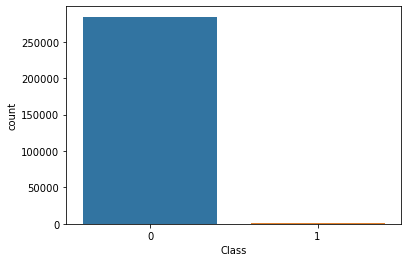

In [12]:
sns.countplot(x=df.Class, data=df)

### Prep dataset for input

In [13]:
X = df.drop('Class', axis=1)     # drop the output series from the dataset to isolate inputs (independent features)
y = df['Class']     # set y to the output series (dependent feature)

## Training Data

### Train, Test, Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)     # setting training size of dataset to 70%

## Model Data

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression     # https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [16]:
LogR = LogisticRegression()     # instantiate logistic regression class object
# Set Grid
grid = {
     'C' : 10.0**np.arange(-2,3)
    ,'penalty' : ['l1', 'l2']     # hyperparameter tuning; regularization parameters
}
# Cross Validation
cv = KFold(         
    n_splits=5
    ,random_state=None
    ,shuffle=False
)

In [17]:
%%time
clf = GridSearchCV(LogR,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

Wall time: 27.3 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [18]:
y_pred = clf.predict(X_test)       # predict

### Scoring LogR

In [19]:
print(confusion_matrix(y_test, y_pred))

[[85270    38]
 [   50    85]]


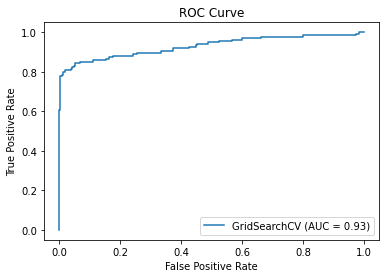

Accuracy =  0.9989700736163291
Precision =  0.6910569105691057
Recall =  0.6296296296296297
F1 Score =  0.6589147286821706
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.69      0.63      0.66       135

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
generate_roc_curve(clf,X_test,y_test)
generate_model_report(y_test,y_pred)
print(classification_report(y_test, y_pred))

## Random Forest Classifier (No cross-validation, hyperparameter tuning)

In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()     # instantiate random forest classifier class object
Rfc.fit(X_train, y_train)          # fit dataset

Wall time: 2min 57s


RandomForestClassifier()

In [22]:
y_pred = Rfc.predict(X_test)       # predict

In [23]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[85302     6]
 [   18   117]]
0.9997191109862715


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.95      0.87      0.91       135

    accuracy                           1.00     85443
   macro avg       0.98      0.93      0.95     85443
weighted avg       1.00      1.00      1.00     85443



## Random Forest Classifier

In [25]:
not_fraud_count = len(df.Class[df.Class == 0])
fraud_count = len(df.Class[df.Class == 1])

In [26]:
class_weight = dict({
    0 : 1,
    1 : (not_fraud_count/fraud_count)
})

In [27]:
class_weight

{0: 1, 1: 577.8760162601626}

In [28]:
%%time
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(class_weight=class_weight)     # instantiate random forest classifier class object
Rfc.fit(X_train, y_train)          # fit dataset

Wall time: 1min 26s


RandomForestClassifier(class_weight={0: 1, 1: 577.8760162601626})

In [29]:
y_pred = Rfc.predict(X_test)       # predict

### Scoring RFC

In [30]:
print(confusion_matrix(y_test, y_pred))

[[85305     3]
 [   23   112]]


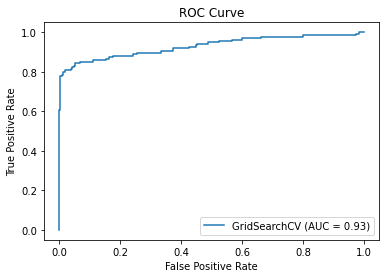

Accuracy =  0.9996957035684608
Precision =  0.9739130434782609
Recall =  0.8296296296296296
F1 Score =  0.896
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.97      0.83      0.90       135

    accuracy                           1.00     85443
   macro avg       0.99      0.91      0.95     85443
weighted avg       1.00      1.00      1.00     85443



In [31]:
generate_roc_curve(clf,X_test,y_test)
generate_model_report(y_test,y_pred)
print(classification_report(y_test, y_pred))

##### Should we think more about precision or recall (ie false-positive or false-negative)? Hint: Might be recall.

stopped here:
https://www.youtube.com/watch?v=pDw_JHHvj-0&t=4226s

# Undersampling

492


<AxesSubplot:xlabel='Class', ylabel='count'>

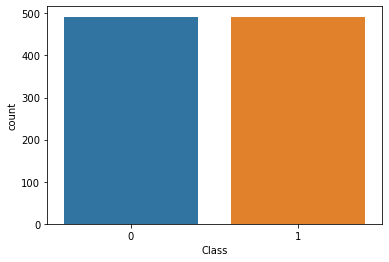

In [32]:
minority_count = len(df.Class[df.Class == 1])

majority_index = df.Class[df.Class == 0].index
minority_index = df.Class[df.Class == 1].index

undersample_majority_index = np.random.choice(majority_index,minority_count,replace=False) # create index array for the undersampled majority
print(len(undersample_majority_index))

undersample_index = np.concatenate([minority_index,undersample_majority_index])
undersample_df = df.loc[undersample_index]

sns.countplot(x=undersample_df.Class, data=undersample_df)

In [33]:
X = undersample_df.drop('Class', axis=1)     # drop the output series from the dataset to isolate inputs (independent features)
y = undersample_df['Class']     # set y to the output series (dependent feature)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)     # setting training size of dataset to 70%

[[142   7]
 [ 13 134]]


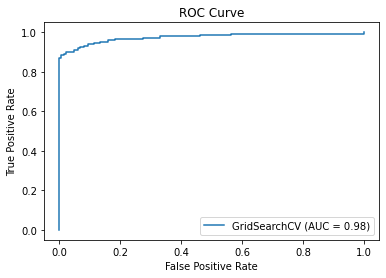

Accuracy =  0.9324324324324325
Precision =  0.950354609929078
Recall =  0.9115646258503401
F1 Score =  0.9305555555555557
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       149
           1       0.95      0.91      0.93       147

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [34]:
LogR = LogisticRegression()     # instantiate logistic regression class object
grid = {'C' : 10.0**np.arange(-2,3),'penalty' : ['l1', 'l2']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)
clf = GridSearchCV(LogR,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 

print(confusion_matrix(y_test, y_pred))
generate_roc_curve(clf,X_test,y_test)
generate_model_report(y_test,y_pred)
print(classification_report(y_test, y_pred))

[[145   4]
 [ 14 133]]


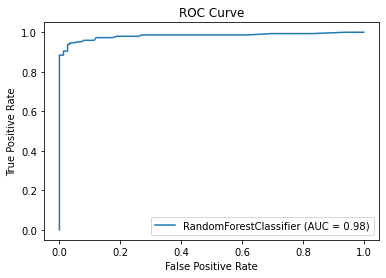

Accuracy =  0.9391891891891891
Precision =  0.9708029197080292
Recall =  0.9047619047619048
F1 Score =  0.9366197183098592
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       149
           1       0.97      0.90      0.94       147

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [35]:
Rfc = RandomForestClassifier()     # instantiate random forest classifier class object
Rfc.fit(X_train, y_train)          # fit dataset
y_pred = Rfc.predict(X_test)  

print(confusion_matrix(y_test, y_pred))
generate_roc_curve(Rfc,X_test,y_test)
generate_model_report(y_test,y_pred)
print(classification_report(y_test, y_pred))

# Oversampling

In [93]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.75)
X_train_os,y_train_os = os.fit_sample(X_train,y_train)
print('Before fit: %s' % Counter(y_train))
print('After fit: %s' % Counter(y_train_os))

Before fit: Counter({0: 199020, 1: 344})
After fit: Counter({0: 199020, 1: 149265})


### Fitting RFC to Oversample

In [94]:
%%time
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()     # instantiate random forest classifier class object
Rfc.fit(X_train_os, y_train_os)    # fit dataset

Wall time: 2min 21s


[[85291     4]
 [   36   112]]


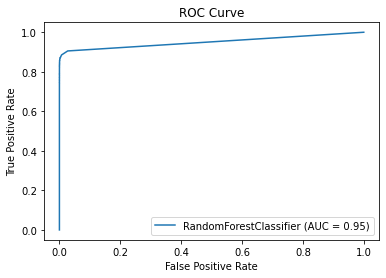

Accuracy =  0.9995318516437859
Precision =  0.9655172413793104
Recall =  0.7567567567567568
F1 Score =  0.8484848484848485
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [95]:
y_pred = Rfc.predict(X_test)       # predict

generate_model_report(y_test,y_pred)
generate_roc_curve(Rfc,X_test,y_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Oversampling with Smote

In [96]:
from imblearn.combine import SMOTETomek # https://imbalanced-learn.org/stable/generated/imblearn.combine.SMOTETomek.html

os_smote = SMOTETomek(0.75)
X_train_os_smote,y_train_os_smote = os.fit_sample(X_train,y_train)
print('Before fit: %s' % Counter(y_train))
print('After fit: %s' % Counter(y_train_os_smote))

Before fit: Counter({0: 199020, 1: 344})
After fit: Counter({0: 199020, 1: 149265})


In [97]:
%%time
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()     # instantiate random forest classifier class object
Rfc.fit(X_train_os_smote, y_train_os_smote)    # fit dataset

Wall time: 2min 21s


RandomForestClassifier()

[[85291     4]
 [   35   113]]


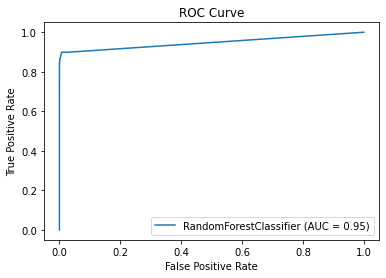

Accuracy =  0.9995435553526912
Precision =  0.9658119658119658
Recall =  0.7635135135135135
F1 Score =  0.8528301886792453
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [98]:
%%time
y_pred = Rfc.predict(X_test)       # predict

generate_model_report(y_test,y_pred)
generate_roc_curve(Rfc,X_test,y_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Oversampling With Smote
-describe it    
-show it    
-describe problem    

In [37]:
from imblearn.over_sampling import SMOTE # https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html

synth_sample = SMOTE(random_state=42,sampling_strategy=1.0,n_jobs=-1)     # ratio is used to set the majority/minority ratio
X = df.drop('Class', axis=1)     # drop the output series from the dataset to isolate inputs (independent features)
y = df['Class']     # set y to the output series (dependent feature)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)     # setting training size of dataset to 70%
X_train_smote, y_train_smote = synth_sample.fit_sample(X_train, y_train)

unique, count = np.unique(y_train, return_counts=True)
print('pre-SMOTE counts: %s' % ({k:v for (k,v) in zip(unique, count)}))

unique, count = np.unique(y_train_smote, return_counts=True)
print('SMOTE counts: %s' % ({k:v for (k,v) in zip(unique, count)}))

SMOTE counts: {0: 199012, 1: 352}
SMOTE counts: {0: 199012, 1: 199012}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[85258    45]
 [   55    85]]


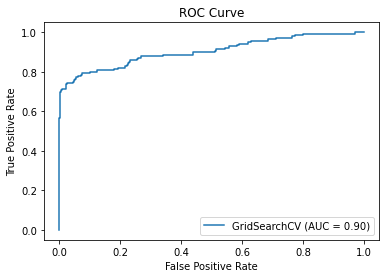

Accuracy =  0.9988296291094648
Precision =  0.6538461538461539
Recall =  0.6071428571428571
F1 Score =  0.6296296296296297
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.65      0.61      0.63       140

    accuracy                           1.00     85443
   macro avg       0.83      0.80      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [38]:
LogR = LogisticRegression()     # instantiate logistic regression class object
grid = {'C' : 10.0**np.arange(-2,3),'penalty' : ['l1', 'l2']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)
clf = GridSearchCV(LogR,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 

print(confusion_matrix(y_test, y_pred))
generate_roc_curve(clf,X_test,y_test)
generate_model_report(y_test,y_pred)
print(classification_report(y_test, y_pred))

[[85299     4]
 [   29   111]]


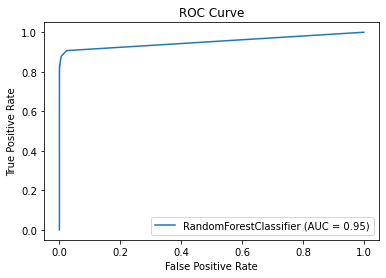

Accuracy =  0.9996137776061234
Precision =  0.9652173913043478
Recall =  0.7928571428571428
F1 Score =  0.8705882352941176
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.97      0.79      0.87       140

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [39]:
Rfc = RandomForestClassifier()     # instantiate random forest classifier class object
Rfc.fit(X_train, y_train)          # fit dataset
y_pred = Rfc.predict(X_test)  

print(confusion_matrix(y_test, y_pred))
generate_roc_curve(Rfc,X_test,y_test)
generate_model_report(y_test,y_pred)
print(classification_report(y_test, y_pred))

In [68]:
%%time
X = df.drop('Class', axis=1)     # drop the output series from the dataset to isolate inputs (independent features)
y = df['Class']     # set y to the output series (dependent feature)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)     # setting training size of dataset to 70%

pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, y_train)

grid_best_params = grid_result.best_params_

print("Best parameters : %s" % grid_best_params)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [63]:
%%time
pipe = make_pipeline(
    SMOTE(sampling_strategy=0.005),
    LogisticRegression()
)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(confusion_matrix(y_test, y_pred))
generate_roc_curve(pipe,X_test,y_test)
generate_model_report(y_test,y_pred)
print(classification_report(y_test, y_pred))

Wall time: 3.42 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[85229    66]
 [   30   118]]


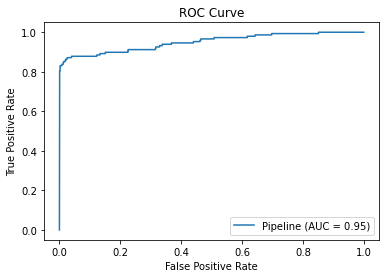

Accuracy =  0.9988764439450862
Precision =  0.6413043478260869
Recall =  0.7972972972972973
F1 Score =  0.7108433734939757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.64      0.80      0.71       148

    accuracy                           1.00     85443
   macro avg       0.82      0.90      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [65]:
print(confusion_matrix(y_test, y_pred))
generate_roc_curve(pipe,X_test,y_test)
generate_model_report(y_test,y_pred)
print(classification_report(y_test, y_pred))

In [69]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_



array([ 9.48228504e+04,  9.91742892e-04, -3.23133619e-03, -2.12073320e-03,
        2.38835551e-03, -2.55483423e-03, -1.02371539e-04,  2.03104211e-04,
        8.49597869e-04,  6.61108867e-04, -1.95314859e-04,  4.83415427e-04,
        5.55617122e-04,  9.30808601e-04,  1.95304026e-04,  1.26736650e-03,
       -1.37346456e-03,  1.49894929e-03, -4.76247598e-04, -5.61583688e-04,
       -2.37564109e-04,  1.83684798e-03,  1.12481015e-05,  1.05545255e-03,
       -2.96839492e-04, -1.35154402e-04, -2.32938189e-04, -5.27512062e-04,
       -5.38715269e-06,  8.88724027e+01])

In [70]:
scaler.scale_

array([4.75447369e+04, 1.96369415e+00, 1.66390531e+00, 1.52163952e+00,
       1.41575501e+00, 1.38563782e+00, 1.33507526e+00, 1.24651056e+00,
       1.18327155e+00, 1.09899628e+00, 1.09072972e+00, 1.02009516e+00,
       9.98327109e-01, 9.94084291e-01, 9.56407327e-01, 9.16128421e-01,
       8.77063555e-01, 8.50233745e-01, 8.39338390e-01, 8.14714671e-01,
       7.78347882e-01, 7.30345273e-01, 7.23846081e-01, 6.21981443e-01,
       6.05191148e-01, 5.21395468e-01, 4.82426223e-01, 4.06465849e-01,
       3.33594888e-01, 2.54609061e+02])

In [71]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.54386357, -0.00382375,  0.504302  , ...,  0.44487068,
        -0.41881139, -0.30070573],
       [ 1.3325376 ,  1.1592651 , -0.36541227, ..., -0.07771403,
        -0.21090983, -0.29014051],
       [-0.2353962 ,  0.62796698,  0.26566093, ..., -0.03762761,
         0.109033  , -0.34206325],
       ...,
       [-0.09874595,  1.05583932,  0.2170233 , ..., -0.14583601,
        -0.18659387, -0.33727159],
       [-0.41823452,  0.21089888,  1.1348809 , ...,  0.32300363,
        -0.15190388, -0.33409024],
       [ 1.6247466 ,  1.02448131, -0.16034099, ..., -0.20651417,
        -0.22707687, -0.30196256]])

In [72]:
X_scaled.mean(axis=0)

array([ 1.37910812e-16,  2.12417222e-17, -1.51650215e-17, -2.31663078e-17,
       -7.09245423e-18, -2.49483314e-18,  6.02324002e-18,  6.67367866e-18,
        4.63326155e-19, -2.22752959e-18, -6.62912807e-18,  9.96151234e-18,
       -8.06365713e-19, -2.07427556e-17,  7.48449943e-18, -5.31043055e-18,
        1.46125941e-17,  7.94782559e-18,  1.29018514e-17, -2.20970936e-18,
        1.06921420e-18,  4.90056511e-18, -1.70361463e-17, -7.75180298e-18,
       -3.13636167e-18, -1.89607319e-17,  1.87825295e-17, -3.42148546e-18,
        4.20557587e-18, -1.73212701e-17])

In [73]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [74]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[3.99130727e-01, 9.58232576e-01, 7.76078131e-01, ...,
        4.19838828e-01, 3.10288542e-01, 4.79153141e-04],
       [9.15445517e-01, 9.97036078e-01, 7.60808853e-01, ...,
        4.15918171e-01, 3.11695966e-01, 5.83858417e-04],
       [4.84009306e-01, 9.79310667e-01, 7.71888391e-01, ...,
        4.16218917e-01, 3.13861872e-01, 6.92845321e-05],
       ...,
       [5.21610297e-01, 9.93585540e-01, 7.71034476e-01, ...,
        4.15407091e-01, 3.11860577e-01, 1.16771683e-04],
       [4.33699099e-01, 9.65396251e-01, 7.87148990e-01, ...,
        4.18924528e-01, 3.12095417e-01, 1.48300038e-04],
       [9.95850406e-01, 9.92539360e-01, 7.64409220e-01, ...,
        4.14951857e-01, 3.11586521e-01, 4.66697494e-04]])

In [75]:
X_train_minmax.mean(axis=0)

array([0.54878146, 0.95836015, 0.76722427, 0.83737688, 0.25383426,
       0.7656991 , 0.26301873, 0.26535675, 0.78539459, 0.46068639,
       0.50871794, 0.28531438, 0.7042136 , 0.44840295, 0.6460597 ,
       0.33642204, 0.43920366, 0.7311733 , 0.65325932, 0.56327098,
       0.58026279, 0.56150911, 0.51003152, 0.66544928, 0.38219415,
       0.57789897, 0.41874302, 0.41650122, 0.31312376, 0.00345926])

In [76]:
X_train_minmax.std(axis=0)

array([0.27516226, 0.03336246, 0.01755666, 0.02636785, 0.06320699,
       0.00932807, 0.01342295, 0.00759388, 0.01269279, 0.03800763,
       0.02256679, 0.06066078, 0.03762713, 0.07694887, 0.03215777,
       0.06848695, 0.0284038 , 0.02470437, 0.0577269 , 0.06362225,
       0.00828747, 0.01177345, 0.03376741, 0.00923696, 0.08154922,
       0.02926724, 0.0797178 , 0.00750243, 0.00676967, 0.00991038])

In [87]:
from collections import Counter
Counter(y_train)

Counter({0: 199020, 1: 344})